# Linear Regression with single variable

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the data and assign column names
data = pd.read_csv('ex1data1.txt',sep=",",header=None)
data.columns = ['population','profit']

In [3]:
#check the head of the data
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
#segregate the data into features(X) and target(y)
X = data['population']
y = data['profit']

Text(0.5,1,'Input Data')

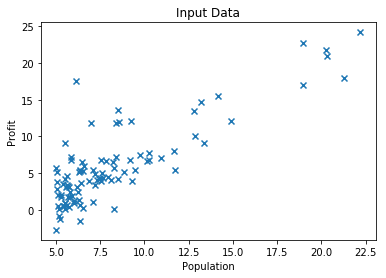

In [5]:
#visualize the data
plt.scatter(X,y,marker='x')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Input Data')

In [6]:
#length of target array
m = len(y)
#add a column of 1's to the features so that theta0 can be taken care
X = np.c_[np.ones(m),X]

theta = np.zeros((2,1))
iterations = 1500
alpha = 0.01

function to compute cost
\begin{equation*}
J(\theta) = \frac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2
\end{equation*}

where the hypothesis $\ h_\theta(x) $ is given by the linear model

\begin{equation*}
h_\theta(x) = \theta^Tx = \theta_0+\theta_1x_1
\end{equation*}

In [7]:
def computeCost(X,y,theta):
    m = len(y)
    J = (1/(2*m))*(np.sum(np.subtract(np.matmul(X,theta).reshape(m),y)**2))
    return J

In [8]:
#test compute cost function
print("With theta=[0,0], Expected cost is (approximately) 32.07. Calculated cost is ",computeCost(X, y, theta))
print("With theta=[-1,2], Expected cost is (approximately) 54.24. Calculated cost is ",computeCost(X, y, [-1,2]))

With theta=[0,0], Expected cost is (approximately) 32.07. Calculated cost is  32.072733877455676
With theta=[-1,2], Expected cost is (approximately) 54.24. Calculated cost is  54.24245508201238


function to compute gradient descent

\begin{equation*}
\theta_j = \theta_j-\alpha\frac{1}{m}\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
\end{equation*}

In [9]:
def gradientDescent(X,y,theta,alpha,iterations):
    m = len(y)
    J_history = np.zeros((iterations,1))
    for i in range(0,iterations):
        temp1 = theta[0]
        temp2 = theta[1]
        
        temp1 = temp1 - alpha*(1/m)*np.sum(np.matmul(np.subtract(np.matmul(X,theta).reshape(m),y),X[:,0]))
        temp2 = temp2 - alpha*(1/m)*np.sum(np.matmul(np.subtract(np.matmul(X,theta).reshape(m),y),X[:,1]))
        
        theta[0] = temp1
        theta[1] = temp2
        
        J_history[i] = computeCost(X,y,theta)
    
    return theta

In [10]:
#compute theta
theta = gradientDescent(X, y, theta, alpha, iterations)

In [11]:
print('Theta found by gradient descent. Expected values (approximately) are \n-3.6303\n 1.1664. \n Calculated theta values are \n',theta)

Theta found by gradient descent. Expected values (approximately) are 
-3.6303
 1.1664. 
 Calculated theta values are 
 [[-3.63029144]
 [ 1.16636235]]


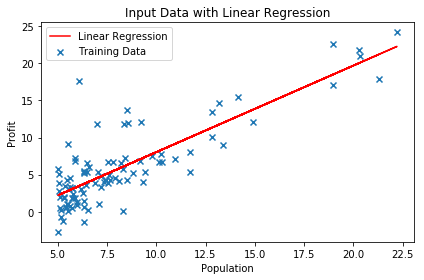

In [12]:
#plot the data with the linear regression line
plt.scatter(X[:,1],y,marker='x')
plt.plot(X[:,1],np.matmul(X,theta),'r')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(['Linear Regression','Training Data'])
plt.title('Input Data with Linear Regression')
plt.tight_layout()

In [13]:
#Run predictions
predict1 = np.matmul([1, 3.5],theta)
predict2 = np.matmul([1, 7],theta)

In [14]:
print('For population of 35,000, we predict the profit as ',predict1[0]*10000)
print('For population of 70,000, we predict the profit as ',predict2[0]*10000)

For population of 35,000, we predict the profit as  4519.767867701772
For population of 70,000, we predict the profit as  45342.45012944714


Visualizing $\ J(\theta_0,\theta_1) $

In [15]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(1,len(theta0_vals)):
    for j in range(1,len(theta1_vals)):
        t = [theta0_vals[i],theta1_vals[j]]
        J_vals[i,j] = computeCost(X,y,t)

#J_vals = J_vals.T

In [16]:
#J_vals = J_vals.reshape(10000)

In [17]:
#theta0_vals = np.linspace(-10, 10, 10000)
#theta1_vals = np.linspace(-1, 4, 10000)
theta0_vals = theta0_vals.reshape(100,1)
theta1_vals = theta1_vals.reshape(100,1)

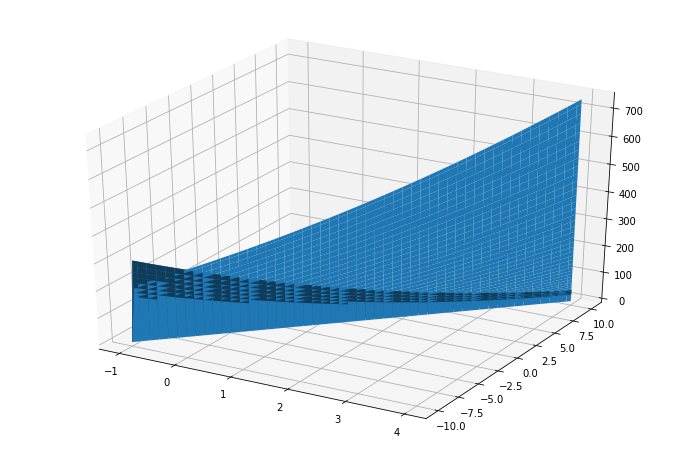

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta1_vals,theta0_vals,J_vals)